In [1]:
import numpy as np
import pandas as pd
import xlrd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder,\
OrdinalEncoder, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, f1_score,\
accuracy_score, classification_report, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from matplotlib import pyplot as plt
import warnings

In [2]:
# Importing CSV of NCAAW regular season team data, pulled from Kaggle
season_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_3/Phase3_Proj/PROJ_CSVs/WRegularSeasonDetailedResults.csv')


In [3]:
# Opening CSV
season_df

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,11,3103,63,3237,49,H,0,23,54,...,13,6,10,11,27,11,23,7,6,19
1,2010,11,3104,73,3399,68,N,0,26,62,...,21,14,27,14,26,7,20,4,2,27
2,2010,11,3110,71,3224,59,A,0,29,62,...,14,19,23,17,23,8,15,6,0,15
3,2010,11,3111,63,3267,58,A,0,27,52,...,26,16,25,22,22,15,11,14,5,14
4,2010,11,3119,74,3447,70,H,1,30,74,...,17,11,21,21,32,12,14,4,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,2023,113,3268,96,3234,68,H,0,34,71,...,38,11,15,18,19,14,24,5,3,14
70003,2023,113,3385,69,3163,64,A,0,23,63,...,21,12,15,11,25,14,12,5,7,19
70004,2023,113,3416,57,3396,53,H,0,19,60,...,26,14,17,16,19,5,9,10,9,20
70005,2023,113,3437,67,3177,64,H,0,24,67,...,19,8,11,21,26,13,12,9,2,14


In [4]:
# Checking CSV info
season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70007 entries, 0 to 70006
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   70007 non-null  int64 
 1   DayNum   70007 non-null  int64 
 2   WTeamID  70007 non-null  int64 
 3   WScore   70007 non-null  int64 
 4   LTeamID  70007 non-null  int64 
 5   LScore   70007 non-null  int64 
 6   WLoc     70007 non-null  object
 7   NumOT    70007 non-null  int64 
 8   WFGM     70007 non-null  int64 
 9   WFGA     70007 non-null  int64 
 10  WFGM3    70007 non-null  int64 
 11  WFGA3    70007 non-null  int64 
 12  WFTM     70007 non-null  int64 
 13  WFTA     70007 non-null  int64 
 14  WOR      70007 non-null  int64 
 15  WDR      70007 non-null  int64 
 16  WAst     70007 non-null  int64 
 17  WTO      70007 non-null  int64 
 18  WStl     70007 non-null  int64 
 19  WBlk     70007 non-null  int64 
 20  WPF      70007 non-null  int64 
 21  LFGM     70007 non-null  int64 
 22

In [5]:
# Looking further at the decriptions of the data to see if there is anything that stands out
season_df.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT,WFGM,WFGA,WFGM3,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,70007.000000,70007.000000,70007.000000,70007.000000,70007.000000,70007.000000,70007.000000,70007.000000,70007.000000,70007.000000,...,70007.000000,70007.000000,70007.000000,70007.000000,70007.000000,70007.000000,70007.000000,70007.000000,70007.000000,70007.000000
mean,2016.363121,69.732684,3284.464468,71.560087,3285.842016,57.197809,0.051966,25.768537,58.955790,6.192224,...,17.769294,10.548617,15.618595,11.764109,22.678218,10.941749,17.293056,7.133058,2.842744,18.160184
std,3.972433,35.822635,103.679278,11.507045,104.902400,10.998869,0.259630,4.969290,7.996305,3.102889,...,6.464240,4.953425,6.660786,4.625909,4.929788,3.804759,5.294115,3.201616,2.076047,4.716219
min,2010.000000,1.000000,3101.000000,30.000000,3101.000000,11.000000,0.000000,9.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2013.000000,37.000000,3196.000000,64.000000,3194.000000,50.000000,0.000000,22.000000,53.000000,4.000000,...,13.000000,7.000000,11.000000,8.000000,19.000000,8.000000,14.000000,5.000000,1.000000,15.000000
50%,2016.000000,73.000000,3283.000000,71.000000,3286.000000,57.000000,0.000000,25.000000,59.000000,6.000000,...,17.000000,10.000000,15.000000,11.000000,23.000000,11.000000,17.000000,7.000000,2.000000,18.000000
75%,2020.000000,101.000000,3376.000000,79.000000,3375.000000,64.000000,0.000000,29.000000,64.000000,8.000000,...,22.000000,14.000000,20.000000,15.000000,26.000000,13.000000,21.000000,9.000000,4.000000,21.000000
max,2023.000000,132.000000,3477.000000,140.000000,3477.000000,130.000000,5.000000,58.000000,113.000000,25.000000,...,80.000000,37.000000,52.000000,38.000000,53.000000,34.000000,49.000000,26.000000,17.000000,47.000000


#### Some interesting findings here!
- The lowest score ever in a season since 2010 for a losing team was 11 points? In comparison a team has won with
    only 30 points...
- There have been a game/games with 5 overtimes!
- It is interesting that certain stats could have a minimum of 0 (no assists, three point attempts, etc??)
    This could mean that we have some missing data that we will need to deal with...

In [6]:
# Looking deeper into our Winning Team 3 Pointers made column, as it's odd that it has a minimum of 0
# It does seem odd that in 672 games the winning team didn't make a singe three-pointer...
season_df.value_counts('WFGM3')

WFGM3
5     9425
6     8977
4     8379
7     7895
8     6619
3     6489
9     5008
2     4433
10    3549
11    2446
1     2180
12    1562
13     966
0      672
14     600
15     352
16     197
17     113
18      72
19      39
20      18
21       9
22       6
25       1
dtype: int64

In [7]:
season_df.loc[season_df['WFGM3'] == 0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
152,2010,13,3187,70,3441,59,H,0,27,56,...,13,9,10,8,21,9,20,6,4,17
236,2010,15,3143,68,3388,65,H,0,27,74,...,17,12,14,13,25,13,24,6,5,20
270,2010,16,3117,72,3115,58,H,0,21,75,...,16,8,23,16,29,10,23,11,4,32
313,2010,17,3107,52,3312,49,A,0,18,52,...,16,20,28,13,23,7,22,12,2,20
423,2010,19,3210,58,3195,48,H,0,22,66,...,18,18,28,8,18,10,14,10,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69650,2023,105,3300,67,3164,54,H,0,22,59,...,33,15,20,9,23,9,12,8,2,26
69705,2023,108,3114,58,3475,50,H,0,23,57,...,10,14,20,2,23,12,20,7,2,15
69749,2023,108,3308,56,3370,47,H,0,20,55,...,20,15,19,5,24,4,21,3,2,19
69795,2023,109,3189,57,3284,48,H,0,22,45,...,23,11,15,13,17,6,17,8,3,15


In [8]:
# Replace '0' values with NaN
#season_df.replace('0', np.nan, inplace=True)

# Create a SimpleImputer object with mean strategy
#imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data
#imputer.fit(season_df)

# Transform the data with imputed values
#season_df_imputed = imputer.transform(season_df)

In [9]:
#season_df_imputed

In [10]:
# My focus is to predict the outcome of this years tournament, so to start I am going to just look at
# the team stats for this current season
# Making a new dataframe to hold this data = now_season_df
# now_season_df = season_df[season_df['Season'] == 2023]

In [11]:
# checking out the new dataframe
# now_season_df

In [12]:
# Checking for null values, and it seems that we have none!
season_df.isna().sum()

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64

In [13]:
# Now pulling in the seed CSV which lists how each team was seeded going into the tourney for that year
# Also taken from kaggle
seeds_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_3/Phase3_Proj/PROJ_CSVs/WNCAATourneySeeds.csv')
seeds_df

,Season,Seed,TeamID
0,1998,W01,3330
1,1998,W02,3163
2,1998,W03,3112
3,1998,W04,3301
4,1998,W05,3272
...,...,...,...
1535,2022,Z12,3125
1536,2022,Z13,3138
1537,2022,Z14,3110
1538,2022,Z15,3218


In [14]:
# Converting the seed data to numerical values so that they can be used in our model
seeds_df['SeedNum'] = seeds_df['Seed'].str.extract('(\d+)').astype(int)

In [15]:
seeds_df

,Season,Seed,TeamID,SeedNum
0,1998,W01,3330,1
1,1998,W02,3163,2
2,1998,W03,3112,3
3,1998,W04,3301,4
4,1998,W05,3272,5
...,...,...,...,...
1535,2022,Z12,3125,12
1536,2022,Z13,3138,13
1537,2022,Z14,3110,14
1538,2022,Z15,3218,15


In [16]:
# Making a dictionary from the dataset so that we can pull every team's "seed" (if they had one) 
# into our initial dataset. We're refencing both the Season and TeamID
team_season_seed_dict = dict(zip(zip(seeds_df['TeamID'], seeds_df['Season']), seeds_df['SeedNum']))

In [17]:
team_season_seed_dict

{(3330, 1998): 1,
 (3163, 1998): 2,
 (3112, 1998): 3,
 (3301, 1998): 4,
 (3272, 1998): 5,
 (3438, 1998): 6,
 (3208, 1998): 7,
 (3307, 1998): 8,
 (3304, 1998): 9,
 (3203, 1998): 10,
 (3374, 1998): 11,
 (3464, 1998): 12,
 (3263, 1998): 13,
 (3365, 1998): 14,
 (3193, 1998): 15,
 (3384, 1998): 16,
 (3403, 1998): 1,
 (3104, 1998): 2,
 (3256, 1998): 3,
 (3345, 1998): 4,
 (3179, 1998): 5,
 (3155, 1998): 6,
 (3417, 1998): 7,
 (3283, 1998): 8,
 (3323, 1998): 9,
 (3276, 1998): 10,
 (3274, 1998): 11,
 (3161, 1998): 12,
 (3449, 1998): 13,
 (3221, 1998): 14,
 (3422, 1998): 15,
 (3212, 1998): 16,
 (3397, 1998): 1,
 (3314, 1998): 2,
 (3228, 1998): 3,
 (3235, 1998): 4,
 (3353, 1998): 5,
 (3435, 1998): 6,
 (3198, 1998): 7,
 (3443, 1998): 8,
 (3372, 1998): 9,
 (3266, 1998): 10,
 (3364, 1998): 11,
 (3332, 1998): 12,
 (3245, 1998): 13,
 (3453, 1998): 14,
 (3224, 1998): 15,
 (3251, 1998): 16,
 (3390, 1998): 1,
 (3181, 1998): 2,
 (3196, 1998): 3,
 (3234, 1998): 4,
 (3242, 1998): 5,
 (3458, 1998): 6,
 (3428,

In [18]:
# Using our dictionary to pull in the seed information based on both the 'WTeamID' and 'LTeamID'
# We'll be making new columns for each
season_df['WSeed'] = season_df.apply(lambda row: team_season_seed_dict.get((row['WTeamID'], row['Season']),\
                                                                           0), axis=1)

In [19]:
season_df['LSeed'] = season_df.apply(lambda row: team_season_seed_dict.get((row['LTeamID'], row['Season']),\
                                                                           0), axis=1)

In [20]:
# Now we'll check out the updated dataset!
season_df

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WSeed,LSeed
0,2010,11,3103,63,3237,49,H,0,23,54,...,10,11,27,11,23,7,6,19,0,0
1,2010,11,3104,73,3399,68,N,0,26,62,...,27,14,26,7,20,4,2,27,0,0
2,2010,11,3110,71,3224,59,A,0,29,62,...,23,17,23,8,15,6,0,15,0,0
3,2010,11,3111,63,3267,58,A,0,27,52,...,25,22,22,15,11,14,5,14,0,0
4,2010,11,3119,74,3447,70,H,1,30,74,...,21,21,32,12,14,4,2,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,2023,113,3268,96,3234,68,H,0,34,71,...,15,18,19,14,24,5,3,14,0,0
70003,2023,113,3385,69,3163,64,A,0,23,63,...,15,11,25,14,12,5,7,19,0,0
70004,2023,113,3416,57,3396,53,H,0,19,60,...,17,16,19,5,9,10,9,20,0,0
70005,2023,113,3437,67,3177,64,H,0,24,67,...,11,21,26,13,12,9,2,14,0,0


In [21]:
season_df.groupby(['WTeamID', 'LTeamID', 'WLoc']).mean()

Season      DayNum     WScore     LScore  NumOT  \
WTeamID LTeamID WLoc                                                         
3101    3102    H     2015.000000   47.000000  80.000000  44.000000    0.0   
        3106    H     2023.000000   32.000000  78.000000  67.000000    0.0   
        3114    N     2022.000000   26.000000  66.000000  61.000000    0.0   
        3117    N     2022.000000   27.000000  81.000000  69.000000    0.0   
        3146    A     2018.333333   86.666667  67.333333  59.333333    0.0   
...                           ...         ...        ...        ...    ...   
3477    3309    A     2023.000000   80.000000  74.000000  69.000000    0.0   
                H     2023.000000  108.000000  83.000000  70.000000    0.0   
        3311    A     2023.000000  112.000000  77.000000  70.000000    0.0   
                H     2023.000000   66.000000  81.000000  48.000000    0.0   
        3322    H     2023.000000  101.000000  67.000000  47.000000    0.0   

                           WFGM       WFGA  WFGM3  WFGA3  WFTM  ...  LFTA  \
WTeamID LTeamID WLoc                                            ...         
3101    3102    H     24.000000  73.000000    8.0   38.0  24.0  ...  16.0   
        3106    H     28.000000  60.000000   13.0   28.0   9.0  ...  13.0   
        3114    N     20.000000  52.000000   11.0   21.0  15.0  ...  15.0   
        3117    N     28.000000  48.000000   14.0   28.0  11.0  ...  16.0   
        3146    A     20.666667  46.333333    6.0   15.0  20.0  ...  16.0   
...                         ...        ...    ...    ...   ...  ...   ...   
3477    3309    A     31.000000  63.000000    4.0   10.0   8.0  ...   9.0   
                H     33.000000  61.000000    4.0   14.0  13.0  ...  12.0   
        3311    A     27.000000  51.000000    5.0   16.0  18.0  ...  16.0   
                H     30.000000  70.000000    6.0   22.0  15.0  ...  12.0   
        3322    H     25.000000  74.000000    3.0   16.0  14.0  ...   4.0   

                            LOR        LDR       LAst        LTO       LStl  \
WTeamID LTeamID WLoc                                                          
3101    3102    H     11.000000  30.000000   8.000000  27.000000   2.000000   
        3106    H      7.000000  20.000000  20.000000  10.000000   6.000000   
        3114    N      8.000000  22.000000  11.000000  18.000000   9.000000   
        3117    N     16.000000  13.000000  12.000000  14.000000   8.000000   
        3146    A     15.333333  18.666667   9.333333  15.333333   9.666667   
...                         ...        ...        ...        ...        ...   
3477    3309    A     15.000000  17.000000  20.000000  23.000000  13.000000   
                H     12.000000  15.000000  16.000000  15.000000  10.000000   
        3311    A     10.000000  22.000000  12.000000  16.000000  15.000000   
                H      4.000000  22.000000  13.000000  20.000000   5.000000   
        3322    H      8.000000  25.000000  11.000000  20.000000   5.000000   

                      LBlk   LPF     WSeed     LSeed  
WTeamID LTeamID WLoc                                  
3101    3102    H      1.0  24.0  0.000000  0.000000  
        3106    H      3.0  18.0  0.000000  0.000000  
        3114    N      4.0  23.0  0.000000  0.000000  
        3117    N      0.0  18.0  0.000000  0.000000  
        3146    A      2.0  22.0  5.333333  4.666667  
...                    ...   ...       ...       ...  
3477    3309    A      4.0  12.0  0.000000  0.000000  
                H      1.0  17.0  0.000000  0.000000  
        3311    A      0.0  23.0  0.000000  0.000000  
                H      2.0  15.0  0.000000  0.000000  
        3322    H      6.0  13.0  0.000000  0.000000  

[30439 rows x 33 columns]

In [22]:
# Digging further into our new dataset to make sure that all of our seed data came in
# The amount of N/A's makes sense as there are 350+ teams and only 64 get selected for March Madness each year
season_df.value_counts('WSeed')

WSeed
0     52258
1      1426
2      1290
12     1188
3      1172
13     1149
11     1148
5      1107
4      1097
6      1073
7      1064
14     1061
8      1039
10     1033
9      1003
15      974
16      925
dtype: int64

In [23]:
# Replacing the N/A's with a zero in keeping our data for this column numerical
season_df.replace('N/A', 0, inplace = True)

In [24]:
season_df.value_counts('WSeed')

WSeed
0     52258
1      1426
2      1290
12     1188
3      1172
13     1149
11     1148
5      1107
4      1097
6      1073
7      1064
14     1061
8      1039
10     1033
9      1003
15      974
16      925
dtype: int64

In [25]:
# Now pulling in a new CSV which lists all of the NCAAW teams and their TeamIDs. Also pulled from Kaggle.
# This corresponds to our previous dataset so that we can match the teams by their ID
teams_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_3/Phase3_Proj/PROJ_CSVs/WTeams.csv')

In [26]:
# Checking out our new team dataframe
teams_df

,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M
...,...,...
370,3473,Lindenwood
371,3474,Queens NC
372,3475,Southern Indiana
373,3476,Stonehill


In [27]:
# Making a dictionary from the dataset so that we can pull the team names into our initial dataset
team_dict = dict(zip(teams_df['TeamID'], teams_df['TeamName']))
team_dict

{3101: 'Abilene Chr',
 3102: 'Air Force',
 3103: 'Akron',
 3104: 'Alabama',
 3105: 'Alabama A&M',
 3106: 'Alabama St',
 3107: 'SUNY Albany',
 3108: 'Alcorn St',
 3109: 'Alliant Intl',
 3110: 'American Univ',
 3111: 'Appalachian St',
 3112: 'Arizona',
 3113: 'Arizona St',
 3114: 'Ark Little Rock',
 3115: 'Ark Pine Bluff',
 3116: 'Arkansas',
 3117: 'Arkansas St',
 3118: 'Armstrong St',
 3119: 'Army',
 3120: 'Auburn',
 3121: 'Augusta',
 3122: 'Austin Peay',
 3123: 'Ball St',
 3124: 'Baylor',
 3125: 'Belmont',
 3126: 'Bethune-Cookman',
 3127: 'Binghamton',
 3128: 'Birmingham So',
 3129: 'Boise St',
 3130: 'Boston College',
 3131: 'Boston Univ',
 3132: 'Bowling Green',
 3133: 'Bradley',
 3134: 'Brooklyn',
 3135: 'Brown',
 3136: 'Bryant',
 3137: 'Bucknell',
 3138: 'Buffalo',
 3139: 'Butler',
 3140: 'BYU',
 3141: 'C Michigan',
 3142: 'Cal Poly',
 3143: 'California',
 3144: 'Campbell',
 3145: 'Canisius',
 3146: 'Cent Arkansas',
 3147: 'Centenary',
 3148: 'Central Conn',
 3149: 'Charleston So',

In [28]:
# Pullng in the tournament data, which is also from Kaggle
tourney_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_3/Phase3_Proj/PROJ_CSVs/WNCAATourneyDetailedResults.csv')
tourney_df

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,138,3124,69,3201,55,N,0,28,57,...,34,3,5,17,19,12,18,4,1,18
1,2010,138,3173,67,3395,66,N,0,23,59,...,27,14,15,18,26,8,8,8,6,22
2,2010,138,3181,72,3214,37,H,0,26,57,...,15,3,8,10,21,4,16,6,4,20
3,2010,138,3199,75,3256,61,H,0,25,63,...,20,17,22,16,21,13,16,5,4,24
4,2010,138,3207,62,3265,42,N,0,24,68,...,26,11,17,16,22,9,10,3,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2022,147,3163,91,3301,87,N,2,37,77,...,23,16,19,6,30,20,13,4,7,16
756,2022,147,3257,62,3276,50,N,0,25,58,...,14,15,20,10,24,9,21,6,2,12
757,2022,151,3163,63,3390,58,N,0,21,57,...,23,8,13,11,23,10,11,11,3,16
758,2022,151,3376,72,3257,59,N,0,27,57,...,8,4,7,11,18,5,15,13,2,17


In [29]:
top_16_teams = tourney_df['WTeamID'].value_counts().head(16)
top_16_teams

3163    59
3323    44
3390    43
3124    39
3376    32
3257    30
3397    24
3268    23
3401    21
3280    18
3181    18
3246    18
3199    16
3400    16
3333    14
3328    13
Name: WTeamID, dtype: int64

In [30]:
top_16_teams = top_16_teams.reset_index()
top_16_teams

,index,WTeamID
0,3163,59
1,3323,44
2,3390,43
3,3124,39
4,3376,32
5,3257,30
6,3397,24
7,3268,23
8,3401,21
9,3280,18


In [75]:
top_16_teams = top_16_teams.replace({'Index': team_dict})

In [73]:
top_16_teams

,index,WTeamID
0,3163,59
1,3323,44
2,3390,43
3,3124,39
4,3376,32
5,3257,30
6,3397,24
7,3268,23
8,3401,21
9,3280,18


In [32]:
# Replacing team IDs in with team names from our dictionary, and creatingb a new dataframe
# season_df2 = season_df.replace({'WTeamID': team_dict, 'LTeamID': team_dict})

In [33]:
# season_df2

In [34]:
# Need a good target for our model, so I am going to split this dataframe into two by winners and losers,
# add in a Win/Lose column, and then append the two new dataframes. 
# Want the flexibility of referencing particular games if necessary, so creating an index that each new 
# dataframe will share.
season_df['index_col'] = season_df.index
season_df

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WSeed,LSeed,index_col
0,2010,11,3103,63,3237,49,H,0,23,54,...,11,27,11,23,7,6,19,0,0,0
1,2010,11,3104,73,3399,68,N,0,26,62,...,14,26,7,20,4,2,27,0,0,1
2,2010,11,3110,71,3224,59,A,0,29,62,...,17,23,8,15,6,0,15,0,0,2
3,2010,11,3111,63,3267,58,A,0,27,52,...,22,22,15,11,14,5,14,0,0,3
4,2010,11,3119,74,3447,70,H,1,30,74,...,21,32,12,14,4,2,14,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,2023,113,3268,96,3234,68,H,0,34,71,...,18,19,14,24,5,3,14,0,0,70002
70003,2023,113,3385,69,3163,64,A,0,23,63,...,11,25,14,12,5,7,19,0,0,70003
70004,2023,113,3416,57,3396,53,H,0,19,60,...,16,19,5,9,10,9,20,0,0,70004
70005,2023,113,3437,67,3177,64,H,0,24,67,...,21,26,13,12,9,2,14,0,0,70005


In [35]:
# Creating the winners dataframe with all of the necessary columns 
# (excluding the 'WFGM' column, as this is already accounted for by the 'WScore')
cols_to_keep = ['index_col', 'Season', 'DayNum', 'WTeamID', 'WSeed', 'WScore', 'WLoc', 'NumOT', 'WFGA', 'WFGM3',\
                'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']
winners_df = season_df[cols_to_keep]
winners_df

,index_col,Season,DayNum,WTeamID,WSeed,WScore,WLoc,NumOT,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF
0,0,2010,11,3103,0,63,H,0,54,5,9,12,19,10,26,14,18,7,0,15
1,1,2010,11,3104,0,73,N,0,62,5,12,16,28,16,31,15,20,5,2,25
2,2,2010,11,3110,0,71,A,0,62,6,15,7,12,14,23,18,13,6,2,17
3,3,2010,11,3111,0,63,A,0,52,4,11,5,9,6,40,14,27,5,10,18
4,4,2010,11,3119,0,74,H,1,74,7,20,7,11,14,33,18,11,5,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,70002,2023,113,3268,0,96,H,0,71,14,26,14,15,11,23,19,11,15,1,14
70003,70003,2023,113,3385,0,69,A,0,63,9,18,14,18,12,26,14,12,4,6,18
70004,70004,2023,113,3416,0,57,H,0,60,4,17,15,27,13,32,9,17,3,7,14
70005,70005,2023,113,3437,0,67,H,0,67,8,23,11,15,10,31,19,14,7,9,10


In [36]:
# Creating our Win/Lose column, where a win is represented by a '1'
winners_df['Win1_Lose0'] = 1

<ipython-input-36-5baecc7e1ad9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners_df['Win1_Lose0'] = 1


In [37]:
winners_df

,index_col,Season,DayNum,WTeamID,WSeed,WScore,WLoc,NumOT,WFGA,WFGM3,...,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,Win1_Lose0
0,0,2010,11,3103,0,63,H,0,54,5,...,12,19,10,26,14,18,7,0,15,1
1,1,2010,11,3104,0,73,N,0,62,5,...,16,28,16,31,15,20,5,2,25,1
2,2,2010,11,3110,0,71,A,0,62,6,...,7,12,14,23,18,13,6,2,17,1
3,3,2010,11,3111,0,63,A,0,52,4,...,5,9,6,40,14,27,5,10,18,1
4,4,2010,11,3119,0,74,H,1,74,7,...,7,11,14,33,18,11,5,3,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,70002,2023,113,3268,0,96,H,0,71,14,...,14,15,11,23,19,11,15,1,14,1
70003,70003,2023,113,3385,0,69,A,0,63,9,...,14,18,12,26,14,12,4,6,18,1
70004,70004,2023,113,3416,0,57,H,0,60,4,...,15,27,13,32,9,17,3,7,14,1
70005,70005,2023,113,3437,0,67,H,0,67,8,...,11,15,10,31,19,14,7,9,10,1


In [38]:
# Renaming each of the columns so that we can easily append the two new dataframes
dict = {'WTeamID': 'TeamID', 'WSeed': 'Seed', 'WScore': 'Score', 'WFGA': 'FGA', 'WFGM3': 'FGM3',\
                'WFGA3': 'FGA3', 'WFTM': 'FTM', 'WFTA': 'FTA', 'WOR': 'OR', 'WDR': 'DR', 'WAst': 'Ast',\
        'WTO': 'TO', 'WStl': 'Stl', 'WBlk': 'Blk', 'WPF': 'PF'}

In [39]:
winners_df.rename(columns = dict, inplace = True)
winners_df

/Users/aheinke/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,index_col,Season,DayNum,TeamID,Seed,Score,WLoc,NumOT,FGA,FGM3,...,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Win1_Lose0
0,0,2010,11,3103,0,63,H,0,54,5,...,12,19,10,26,14,18,7,0,15,1
1,1,2010,11,3104,0,73,N,0,62,5,...,16,28,16,31,15,20,5,2,25,1
2,2,2010,11,3110,0,71,A,0,62,6,...,7,12,14,23,18,13,6,2,17,1
3,3,2010,11,3111,0,63,A,0,52,4,...,5,9,6,40,14,27,5,10,18,1
4,4,2010,11,3119,0,74,H,1,74,7,...,7,11,14,33,18,11,5,3,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,70002,2023,113,3268,0,96,H,0,71,14,...,14,15,11,23,19,11,15,1,14,1
70003,70003,2023,113,3385,0,69,A,0,63,9,...,14,18,12,26,14,12,4,6,18,1
70004,70004,2023,113,3416,0,57,H,0,60,4,...,15,27,13,32,9,17,3,7,14,1
70005,70005,2023,113,3437,0,67,H,0,67,8,...,11,15,10,31,19,14,7,9,10,1


In [40]:
winners_df

,index_col,Season,DayNum,TeamID,Seed,Score,WLoc,NumOT,FGA,FGM3,...,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Win1_Lose0
0,0,2010,11,3103,0,63,H,0,54,5,...,12,19,10,26,14,18,7,0,15,1
1,1,2010,11,3104,0,73,N,0,62,5,...,16,28,16,31,15,20,5,2,25,1
2,2,2010,11,3110,0,71,A,0,62,6,...,7,12,14,23,18,13,6,2,17,1
3,3,2010,11,3111,0,63,A,0,52,4,...,5,9,6,40,14,27,5,10,18,1
4,4,2010,11,3119,0,74,H,1,74,7,...,7,11,14,33,18,11,5,3,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,70002,2023,113,3268,0,96,H,0,71,14,...,14,15,11,23,19,11,15,1,14,1
70003,70003,2023,113,3385,0,69,A,0,63,9,...,14,18,12,26,14,12,4,6,18,1
70004,70004,2023,113,3416,0,57,H,0,60,4,...,15,27,13,32,9,17,3,7,14,1
70005,70005,2023,113,3437,0,67,H,0,67,8,...,11,15,10,31,19,14,7,9,10,1


In [41]:
# Creating the losers dataframe with all of the necessary columns 
# (excluding the 'LFGM' column, as this is already accounted for by the 'LScore')
cols_to_keep = ['index_col', 'Season', 'DayNum', 'LTeamID', 'LSeed', 'LScore', 'WLoc', 'NumOT', 'LFGA', 'LFGM3',\
                'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']
losers_df = season_df[cols_to_keep]
losers_df

,index_col,Season,DayNum,LTeamID,LSeed,LScore,WLoc,NumOT,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,0,2010,11,3237,0,49,H,0,54,3,13,6,10,11,27,11,23,7,6,19
1,1,2010,11,3399,0,68,N,0,63,4,21,14,27,14,26,7,20,4,2,27
2,2,2010,11,3224,0,59,A,0,58,2,14,19,23,17,23,8,15,6,0,15
3,3,2010,11,3267,0,58,A,0,74,6,26,16,25,22,22,15,11,14,5,14
4,4,2010,11,3447,0,70,H,1,74,9,17,11,21,21,32,12,14,4,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,70002,2023,113,3234,0,68,H,0,66,11,38,11,15,18,19,14,24,5,3,14
70003,70003,2023,113,3163,0,64,A,0,62,8,21,12,15,11,25,14,12,5,7,19
70004,70004,2023,113,3396,0,53,H,0,70,7,26,14,17,16,19,5,9,10,9,20
70005,70005,2023,113,3177,0,64,H,0,77,4,19,8,11,21,26,13,12,9,2,14


In [42]:
# Creating our Win/Lose column, where a loss is represented by a '0'
losers_df['Win1_Lose0'] = 0

<ipython-input-42-794fc49922ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  losers_df['Win1_Lose0'] = 0


In [43]:
losers_df

,index_col,Season,DayNum,LTeamID,LSeed,LScore,WLoc,NumOT,LFGA,LFGM3,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Win1_Lose0
0,0,2010,11,3237,0,49,H,0,54,3,...,6,10,11,27,11,23,7,6,19,0
1,1,2010,11,3399,0,68,N,0,63,4,...,14,27,14,26,7,20,4,2,27,0
2,2,2010,11,3224,0,59,A,0,58,2,...,19,23,17,23,8,15,6,0,15,0
3,3,2010,11,3267,0,58,A,0,74,6,...,16,25,22,22,15,11,14,5,14,0
4,4,2010,11,3447,0,70,H,1,74,9,...,11,21,21,32,12,14,4,2,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,70002,2023,113,3234,0,68,H,0,66,11,...,11,15,18,19,14,24,5,3,14,0
70003,70003,2023,113,3163,0,64,A,0,62,8,...,12,15,11,25,14,12,5,7,19,0
70004,70004,2023,113,3396,0,53,H,0,70,7,...,14,17,16,19,5,9,10,9,20,0
70005,70005,2023,113,3177,0,64,H,0,77,4,...,8,11,21,26,13,12,9,2,14,0


In [44]:
# Renaming each of the columns so that we can easily append the two new dataframes
dict = {'LTeamID': 'TeamID', 'LSeed': 'Seed', 'LScore': 'Score', 'LFGA': 'FGA', 'LFGM3': 'FGM3',\
                'LFGA3': 'FGA3', 'LFTM': 'FTM', 'LFTA': 'FTA', 'LOR': 'OR', 'LDR': 'DR', 'LAst': 'Ast',\
        'LTO': 'TO', 'LStl': 'Stl', 'LBlk': 'Blk', 'LPF': 'PF'}

In [45]:
losers_df.rename(columns = dict, inplace = True)
losers_df

/Users/aheinke/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,index_col,Season,DayNum,TeamID,Seed,Score,WLoc,NumOT,FGA,FGM3,...,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Win1_Lose0
0,0,2010,11,3237,0,49,H,0,54,3,...,6,10,11,27,11,23,7,6,19,0
1,1,2010,11,3399,0,68,N,0,63,4,...,14,27,14,26,7,20,4,2,27,0
2,2,2010,11,3224,0,59,A,0,58,2,...,19,23,17,23,8,15,6,0,15,0
3,3,2010,11,3267,0,58,A,0,74,6,...,16,25,22,22,15,11,14,5,14,0
4,4,2010,11,3447,0,70,H,1,74,9,...,11,21,21,32,12,14,4,2,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,70002,2023,113,3234,0,68,H,0,66,11,...,11,15,18,19,14,24,5,3,14,0
70003,70003,2023,113,3163,0,64,A,0,62,8,...,12,15,11,25,14,12,5,7,19,0
70004,70004,2023,113,3396,0,53,H,0,70,7,...,14,17,16,19,5,9,10,9,20,0
70005,70005,2023,113,3177,0,64,H,0,77,4,...,8,11,21,26,13,12,9,2,14,0


In [46]:
losers_df

,index_col,Season,DayNum,TeamID,Seed,Score,WLoc,NumOT,FGA,FGM3,...,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Win1_Lose0
0,0,2010,11,3237,0,49,H,0,54,3,...,6,10,11,27,11,23,7,6,19,0
1,1,2010,11,3399,0,68,N,0,63,4,...,14,27,14,26,7,20,4,2,27,0
2,2,2010,11,3224,0,59,A,0,58,2,...,19,23,17,23,8,15,6,0,15,0
3,3,2010,11,3267,0,58,A,0,74,6,...,16,25,22,22,15,11,14,5,14,0
4,4,2010,11,3447,0,70,H,1,74,9,...,11,21,21,32,12,14,4,2,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,70002,2023,113,3234,0,68,H,0,66,11,...,11,15,18,19,14,24,5,3,14,0
70003,70003,2023,113,3163,0,64,A,0,62,8,...,12,15,11,25,14,12,5,7,19,0
70004,70004,2023,113,3396,0,53,H,0,70,7,...,14,17,16,19,5,9,10,9,20,0
70005,70005,2023,113,3177,0,64,H,0,77,4,...,8,11,21,26,13,12,9,2,14,0


In [47]:
# Appending our winning and losing dataframes into a new dataframe that we can run through our models!
ncaa_wmns_df = winners_df.append(losers_df)
ncaa_wmns_df

,index_col,Season,DayNum,TeamID,Seed,Score,WLoc,NumOT,FGA,FGM3,...,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Win1_Lose0
0,0,2010,11,3103,0,63,H,0,54,5,...,12,19,10,26,14,18,7,0,15,1
1,1,2010,11,3104,0,73,N,0,62,5,...,16,28,16,31,15,20,5,2,25,1
2,2,2010,11,3110,0,71,A,0,62,6,...,7,12,14,23,18,13,6,2,17,1
3,3,2010,11,3111,0,63,A,0,52,4,...,5,9,6,40,14,27,5,10,18,1
4,4,2010,11,3119,0,74,H,1,74,7,...,7,11,14,33,18,11,5,3,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,70002,2023,113,3234,0,68,H,0,66,11,...,11,15,18,19,14,24,5,3,14,0
70003,70003,2023,113,3163,0,64,A,0,62,8,...,12,15,11,25,14,12,5,7,19,0
70004,70004,2023,113,3396,0,53,H,0,70,7,...,14,17,16,19,5,9,10,9,20,0
70005,70005,2023,113,3177,0,64,H,0,77,4,...,8,11,21,26,13,12,9,2,14,0


In [48]:
# Decided to chnage the column name of our index column so that it makes more sense in reference to each game
ncaa_wmns_df.rename(columns = {'index_col': 'GameID'}, inplace = True)

In [49]:
ncaa_wmns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140014 entries, 0 to 70006
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   GameID      140014 non-null  int64 
 1   Season      140014 non-null  int64 
 2   DayNum      140014 non-null  int64 
 3   TeamID      140014 non-null  int64 
 4   Seed        140014 non-null  int64 
 5   Score       140014 non-null  int64 
 6   WLoc        140014 non-null  object
 7   NumOT       140014 non-null  int64 
 8   FGA         140014 non-null  int64 
 9   FGM3        140014 non-null  int64 
 10  FGA3        140014 non-null  int64 
 11  FTM         140014 non-null  int64 
 12  FTA         140014 non-null  int64 
 13  OR          140014 non-null  int64 
 14  DR          140014 non-null  int64 
 15  Ast         140014 non-null  int64 
 16  TO          140014 non-null  int64 
 17  Stl         140014 non-null  int64 
 18  Blk         140014 non-null  int64 
 19  PF          140014 non-n

In [50]:
# Again, changing our column which depicts where the game was played into numeric values for our model
wloc_map = {'H': 1, 'A': 0, 'N': 2}
ncaa_wmns_df['WLoc'] = ncaa_wmns_df['WLoc'].map(wloc_map)

In [51]:
ncaa_wmns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140014 entries, 0 to 70006
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   GameID      140014 non-null  int64
 1   Season      140014 non-null  int64
 2   DayNum      140014 non-null  int64
 3   TeamID      140014 non-null  int64
 4   Seed        140014 non-null  int64
 5   Score       140014 non-null  int64
 6   WLoc        140014 non-null  int64
 7   NumOT       140014 non-null  int64
 8   FGA         140014 non-null  int64
 9   FGM3        140014 non-null  int64
 10  FGA3        140014 non-null  int64
 11  FTM         140014 non-null  int64
 12  FTA         140014 non-null  int64
 13  OR          140014 non-null  int64
 14  DR          140014 non-null  int64
 15  Ast         140014 non-null  int64
 16  TO          140014 non-null  int64
 17  Stl         140014 non-null  int64
 18  Blk         140014 non-null  int64
 19  PF          140014 non-null  int64
 20  Win1_

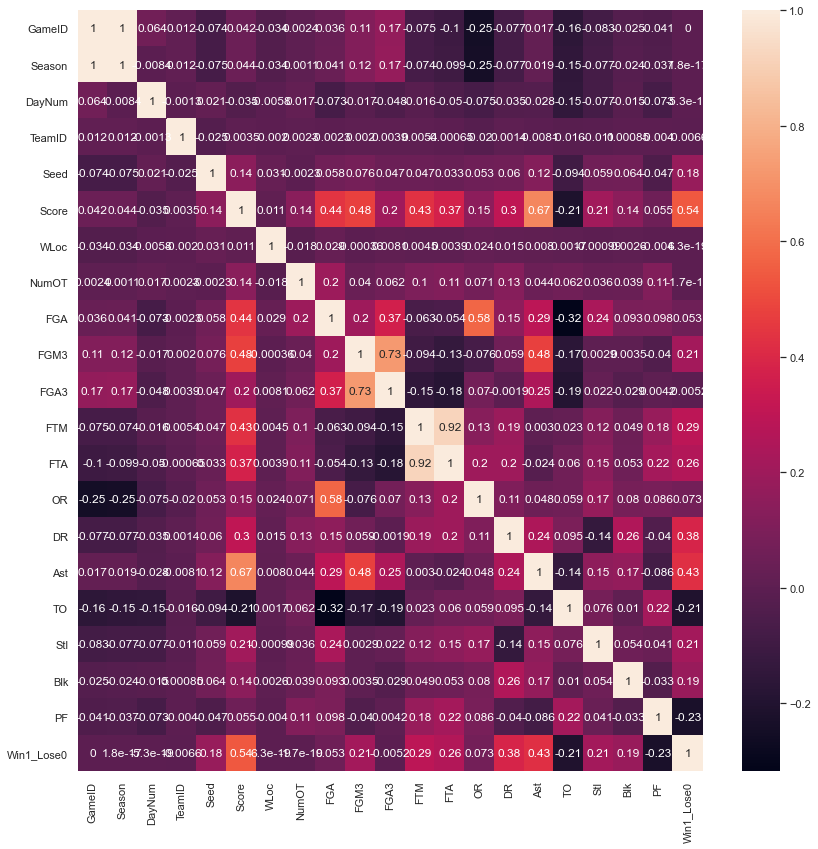

In [52]:
# Heatmap for Collinearity
sns.set(rc={'figure.figsize':(14, 14)})
sns.heatmap(ncaa_wmns_df.corr(),annot=True);

# Of course three-pointers attempted (FGA3) and three-pointers made (FGM3) and 
# free throw made (FTM) and free throws attempted (FTA) are closely correlated

In [53]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import xgboost as xgb

In [54]:
X = ncaa_wmns_df.drop('Win1_Lose0', axis=1)
y = ncaa_wmns_df['Win1_Lose0']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
xgb_model = xgb.XGBClassifier()

In [56]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
y_pred = xgb_model.predict(X_test)

In [58]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8861193443559618
0.8865253272623791
0.8865884027036641
0.886556863861122


In [59]:
ncaa_wmns_df2 = ncaa_wmns_df.loc[ncaa_wmns_df['Season'] < 2023]
ncaa_wmns_df2

,GameID,Season,DayNum,TeamID,Seed,Score,WLoc,NumOT,FGA,FGM3,...,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Win1_Lose0
0,0,2010,11,3103,0,63,1,0,54,5,...,12,19,10,26,14,18,7,0,15,1
1,1,2010,11,3104,0,73,2,0,62,5,...,16,28,16,31,15,20,5,2,25,1
2,2,2010,11,3110,0,71,0,0,62,6,...,7,12,14,23,18,13,6,2,17,1
3,3,2010,11,3111,0,63,0,0,52,4,...,5,9,6,40,14,27,5,10,18,1
4,4,2010,11,3119,0,74,1,1,74,7,...,7,11,14,33,18,11,5,3,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65404,65404,2022,132,3180,0,59,2,0,63,4,...,15,17,14,20,12,9,6,0,18,0
65405,65405,2022,132,3320,0,48,2,0,55,4,...,8,10,8,26,10,6,1,5,14,0
65406,65406,2022,132,3368,0,52,2,1,56,5,...,11,20,13,22,11,16,11,3,20,0
65407,65407,2022,132,3136,0,42,1,0,45,4,...,4,5,8,17,13,20,5,1,15,0


In [60]:
X = ncaa_wmns_df2.drop('Win1_Lose0', axis=1)
y = ncaa_wmns_df2['Win1_Lose0']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
xgb_model = xgb.XGBClassifier()

In [62]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
y_pred = xgb_model.predict(X_test)

In [64]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8885109310502981
0.8884057971014493
0.8890161056407908
0.888710846591126


In [65]:
ncaa_wmns_df2.groupby(['TeamID', 'GameID','WLoc']).mean()

Season  DayNum  Seed  Score  NumOT  FGA  FGM3  FGA3  FTM  \
TeamID GameID WLoc                                                             
3101   20995  1       2014      19     0     50      0   61     6    31    8   
       21042  2       2014      20     0     57      0   52     5    19   14   
       21139  2       2014      23     0     79      0   61     7    21   14   
       21746  1       2014      40     0     61      0   65     5    30   12   
       21885  1       2014      44     0     55      0   55    13    33    4   
...                    ...     ...   ...    ...    ...  ...   ...   ...  ...   
3472   64229  1       2022     105     0     53      0   47     5    12    4   
       64376  0       2022     108     0     46      0   45     5    15   13   
       64502  0       2022     110     0     42      0   48     4    18    6   
       64679  1       2022     115     0     63      0   60     7    23    8   
       64915  0       2022     117     0     61      0   48     5    11   12   

                    FTA  OR  DR  Ast  TO  Stl  Blk  PF  Win1_Lose0  
TeamID GameID WLoc                                                  
3101   20995  1      15  11  19    7  22   13    2  19           0  
       21042  2      21  11  24    7  23    9    2  24           0  
       21139  2      28  12  26    9  16    9    5  29           1  
       21746  1      20  14  24   11  24   11    6  18           0  
       21885  1       5  12  12   16  23    9    2  19           0  
...                 ...  ..  ..  ...  ..  ...  ...  ..         ...  
3472   64229  1       7   2  21   11  16    2    2  14           0  
       64376  0      23   3  19    8  16    5    3  17           0  
       64502  0       9   3  17   10  18    2    3  13           0  
       64679  1      13   7  25   10   7    5    0  18           0  
       64915  0      19   7  33   10  21    3    3  16           1  

[130818 rows x 18 columns]

In [66]:
ncaa_wmns_df

,GameID,Season,DayNum,TeamID,Seed,Score,WLoc,NumOT,FGA,FGM3,...,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Win1_Lose0
0,0,2010,11,3103,0,63,1,0,54,5,...,12,19,10,26,14,18,7,0,15,1
1,1,2010,11,3104,0,73,2,0,62,5,...,16,28,16,31,15,20,5,2,25,1
2,2,2010,11,3110,0,71,0,0,62,6,...,7,12,14,23,18,13,6,2,17,1
3,3,2010,11,3111,0,63,0,0,52,4,...,5,9,6,40,14,27,5,10,18,1
4,4,2010,11,3119,0,74,1,1,74,7,...,7,11,14,33,18,11,5,3,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,70002,2023,113,3234,0,68,1,0,66,11,...,11,15,18,19,14,24,5,3,14,0
70003,70003,2023,113,3163,0,64,0,0,62,8,...,12,15,11,25,14,12,5,7,19,0
70004,70004,2023,113,3396,0,53,1,0,70,7,...,14,17,16,19,5,9,10,9,20,0
70005,70005,2023,113,3177,0,64,1,0,77,4,...,8,11,21,26,13,12,9,2,14,0


In [67]:
ncaa_wmns_df.groupby(['TeamID', 'GameID','WLoc']).mean()

Season  DayNum  Seed  Score  NumOT  FGA  FGM3  FGA3  FTM  \
TeamID GameID WLoc                                                             
3101   20995  1       2014      19     0     50      0   61     6    31    8   
       21042  2       2014      20     0     57      0   52     5    19   14   
       21139  2       2014      23     0     79      0   61     7    21   14   
       21746  1       2014      40     0     61      0   65     5    30   12   
       21885  1       2014      44     0     55      0   55    13    33    4   
...                    ...     ...   ...    ...    ...  ...   ...   ...  ...   
3477   69450  1       2023     101     0     67      0   74     3    16   14   
       69532  1       2023     103     0     66      0   55     3     9   11   
       69787  1       2023     108     0     83      0   61     4    14   13   
       69906  0       2023     110     0     55      0   46     4    14   11   
       69998  0       2023     112     0     77      0   51     5    16   18   

                    FTA  OR  DR  Ast  TO  Stl  Blk  PF  Win1_Lose0  
TeamID GameID WLoc                                                  
3101   20995  1      15  11  19    7  22   13    2  19           0  
       21042  2      21  11  24    7  23    9    2  24           0  
       21139  2      28  12  26    9  16    9    5  29           1  
       21746  1      20  14  24   11  24   11    6  18           0  
       21885  1       5  12  12   16  23    9    2  19           0  
...                 ...  ..  ..  ...  ..  ...  ...  ..         ...  
3477   69450  1      20  22  29   12  12   11    8   9           1  
       69532  1      23  11  21    7  20   11    2  23           0  
       69787  1      14  11  25   18  18    6    6  13           1  
       69906  0      20  12  27   14  19    0    4  17           0  
       69998  0      29   8  29   18  20    6    1  12           1  

[140014 rows x 18 columns]

In [68]:
ncaa_wmns_df.groupby(['TeamID']).mean()

,GameID,Season,DayNum,Seed,Score,WLoc,NumOT,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Win1_Lose0
TeamID,,,,,,,,,,,,,,,,,,,,
3101,45877.995951,2018.445344,76.076923,1.813765,69.935223,0.769231,0.024291,56.372470,8.267206,24.947368,13.400810,18.611336,12.149798,23.574899,14.283401,17.259109,7.955466,3.303644,17.311741,0.595142
3102,35141.723192,2016.391521,69.902743,0.000000,56.451372,0.683292,0.024938,57.254364,4.132170,14.486284,11.062344,16.371571,11.593516,22.261845,11.563591,17.620948,8.209476,2.249377,18.112219,0.201995
3103,34386.863980,2016.219144,72.979849,1.015113,68.964736,0.670025,0.040302,60.052897,6.508816,19.969773,12.969773,17.967254,11.181360,26.209068,14.508816,16.083123,6.909320,2.969773,16.979849,0.521411
3104,35032.573141,2016.405276,65.630695,0.419664,66.256595,0.942446,0.074341,59.717026,5.642686,18.402878,13.472422,20.064748,12.817746,25.035971,11.810552,16.306954,8.350120,3.448441,17.230216,0.515588
3105,35282.861619,2016.386423,73.934726,0.000000,59.339426,0.718016,0.046997,56.827676,3.668407,13.556136,13.127937,19.968668,12.728460,24.224543,10.757180,18.417755,7.498695,2.832898,18.488251,0.378590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,67656.130435,2023.000000,60.086957,0.000000,54.521739,0.826087,0.000000,50.434783,6.391304,21.347826,8.652174,13.086957,6.260870,19.086957,11.913043,19.304348,6.347826,2.043478,16.086957,0.043478
3474,67931.956522,2023.000000,66.608696,0.000000,56.913043,0.608696,0.000000,57.956522,4.565217,16.565217,11.826087,18.043478,8.521739,20.130435,6.434783,14.652174,7.304348,2.173913,21.521739,0.217391
3475,67931.083333,2023.000000,66.750000,0.000000,62.416667,0.666667,0.041667,55.416667,4.375000,15.750000,14.625000,19.041667,8.916667,23.916667,13.375000,20.083333,7.708333,2.875000,18.916667,0.333333


In [69]:
now_season_df = ncaa_wmns_df[ncaa_wmns_df['Season'] == 2023]
now_season_df

,GameID,Season,DayNum,TeamID,Seed,Score,WLoc,NumOT,FGA,FGM3,...,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Win1_Lose0
65409,65409,2023,7,3102,0,67,0,0,61,6,...,17,18,10,25,16,11,11,4,24,1
65410,65410,2023,7,3104,0,98,1,0,58,13,...,23,33,11,35,18,12,10,7,23,1
65411,65411,2023,7,3113,0,69,1,0,72,4,...,13,18,15,28,11,12,9,5,17,1
65412,65412,2023,7,3116,0,70,0,0,58,7,...,17,36,11,20,3,13,6,0,14,1
65413,65413,2023,7,3124,0,88,1,0,68,9,...,13,20,12,26,22,10,6,5,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70002,70002,2023,113,3234,0,68,1,0,66,11,...,11,15,18,19,14,24,5,3,14,0
70003,70003,2023,113,3163,0,64,0,0,62,8,...,12,15,11,25,14,12,5,7,19,0
70004,70004,2023,113,3396,0,53,1,0,70,7,...,14,17,16,19,5,9,10,9,20,0
70005,70005,2023,113,3177,0,64,1,0,77,4,...,8,11,21,26,13,12,9,2,14,0


In [70]:
now_gpby_df = now_season_df.groupby(['TeamID']).mean()
now_gpby_df

,GameID,Season,DayNum,Seed,Score,WLoc,NumOT,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Win1_Lose0
TeamID,,,,,,,,,,,,,,,,,,,,
3101,67900.826087,2023.0,66.043478,0.0,69.260870,0.869565,0.000000,57.086957,8.434783,24.521739,9.956522,14.521739,9.478261,21.565217,14.086957,15.130435,7.260870,2.652174,16.826087,0.391304
3102,67680.120000,2023.0,61.280000,0.0,63.680000,0.800000,0.000000,58.480000,5.480000,16.840000,11.480000,15.840000,7.000000,19.000000,11.400000,12.320000,9.880000,1.640000,17.520000,0.400000
3103,67857.391304,2023.0,65.695652,0.0,66.652174,0.695652,0.043478,54.695652,6.043478,20.391304,15.130435,19.608696,6.434783,25.826087,15.217391,15.782609,7.652174,4.391304,13.217391,0.565217
3104,67608.444444,2023.0,59.148148,0.0,70.592593,0.666667,0.000000,57.222222,8.888889,23.666667,11.037037,15.074074,8.518519,22.888889,13.333333,14.592593,8.925926,4.074074,17.185185,0.740741
3105,67848.840000,2023.0,65.000000,0.0,57.080000,0.760000,0.080000,55.880000,4.360000,16.600000,13.120000,18.320000,10.000000,23.720000,9.560000,16.560000,6.200000,3.080000,14.840000,0.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,67656.130435,2023.0,60.086957,0.0,54.521739,0.826087,0.000000,50.434783,6.391304,21.347826,8.652174,13.086957,6.260870,19.086957,11.913043,19.304348,6.347826,2.043478,16.086957,0.043478
3474,67931.956522,2023.0,66.608696,0.0,56.913043,0.608696,0.000000,57.956522,4.565217,16.565217,11.826087,18.043478,8.521739,20.130435,6.434783,14.652174,7.304348,2.173913,21.521739,0.217391
3475,67931.083333,2023.0,66.750000,0.0,62.416667,0.666667,0.041667,55.416667,4.375000,15.750000,14.625000,19.041667,8.916667,23.916667,13.375000,20.083333,7.708333,2.875000,18.916667,0.333333


In [71]:
now_gpby_df = now_gpby_df.reset_index()
now_gpby_df

,TeamID,GameID,Season,DayNum,Seed,Score,WLoc,NumOT,FGA,FGM3,...,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Win1_Lose0
0,3101,67900.826087,2023.0,66.043478,0.0,69.260870,0.869565,0.000000,57.086957,8.434783,...,9.956522,14.521739,9.478261,21.565217,14.086957,15.130435,7.260870,2.652174,16.826087,0.391304
1,3102,67680.120000,2023.0,61.280000,0.0,63.680000,0.800000,0.000000,58.480000,5.480000,...,11.480000,15.840000,7.000000,19.000000,11.400000,12.320000,9.880000,1.640000,17.520000,0.400000
2,3103,67857.391304,2023.0,65.695652,0.0,66.652174,0.695652,0.043478,54.695652,6.043478,...,15.130435,19.608696,6.434783,25.826087,15.217391,15.782609,7.652174,4.391304,13.217391,0.565217
3,3104,67608.444444,2023.0,59.148148,0.0,70.592593,0.666667,0.000000,57.222222,8.888889,...,11.037037,15.074074,8.518519,22.888889,13.333333,14.592593,8.925926,4.074074,17.185185,0.740741
4,3105,67848.840000,2023.0,65.000000,0.0,57.080000,0.760000,0.080000,55.880000,4.360000,...,13.120000,18.320000,10.000000,23.720000,9.560000,16.560000,6.200000,3.080000,14.840000,0.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,3473,67656.130435,2023.0,60.086957,0.0,54.521739,0.826087,0.000000,50.434783,6.391304,...,8.652174,13.086957,6.260870,19.086957,11.913043,19.304348,6.347826,2.043478,16.086957,0.043478
357,3474,67931.956522,2023.0,66.608696,0.0,56.913043,0.608696,0.000000,57.956522,4.565217,...,11.826087,18.043478,8.521739,20.130435,6.434783,14.652174,7.304348,2.173913,21.521739,0.217391
358,3475,67931.083333,2023.0,66.750000,0.0,62.416667,0.666667,0.041667,55.416667,4.375000,...,14.625000,19.041667,8.916667,23.916667,13.375000,20.083333,7.708333,2.875000,18.916667,0.333333
359,3476,67660.230769,2023.0,59.384615,0.0,58.576923,0.615385,0.038462,55.846154,6.115385,...,9.615385,13.500000,8.615385,22.269231,13.884615,14.807692,4.000000,2.576923,15.307692,0.269231


In [72]:
import itertools
# Define the column you want to generate all possible pairs for
column_name = 'TeamID'

# Get all unique values in the column
unique_values = now_gpby_df[column_name].unique()

# Generate all possible pairs of values
value_pairs = list(itertools.combinations(unique_values, 2))

# Create a DataFrame to store the predictions for each pair
predictions_df = pd.DataFrame(columns=['Team' + '_1', 'Team' + '_2', 'Prediction'])

# Loop through each pair of values and make a prediction
for pair in value_pairs:
    # Create a new DataFrame containing the features for the matchup you want to predict
    matchup_features = pd.DataFrame({
        'index_col': [0],
        'Season': [0],
        'DayNum': [0],
        'TeamID': [0],
        'Seed': [0],
        'Score': [0],
        'WLoc': [0],
        'NumOT': [0],
        'FGA': [0],
        'FGM3': [0],
        'FGA3': [0],
        'FTM': [0],
        'FTA': [0],
        'OR': [0],
        'DR': [0],
        'Ast': [0],
        'TO': [0],
        'Stl': [0],
        'Blk': [0],
        'PF': [0],
    })

    # Make a prediction using your XGBoost model
    prediction = xgb_model.predict(matchup_features)

    # Append the prediction to the DataFrame
    predictions_df = predictions_df.append({
        'Team' + '_1': pair[0],
        'Team' + '_2': pair[1],
        'Prediction': prediction[0]
    }, ignore_index=True)

# Print the predictions DataFrame
predictions_df

ValueError: feature_names mismatch: ['GameID', 'Season', 'DayNum', 'TeamID', 'Seed', 'Score', 'WLoc', 'NumOT', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF'] ['index_col', 'Season', 'DayNum', 'TeamID', 'Seed', 'Score', 'WLoc', 'NumOT', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF']
expected GameID in input data
training data did not have the following fields: index_col

In [ ]:
predictions_df.value_counts('Prediction')

In [ ]:
# Define the column you want to generate all possible pairs for
column_name = 'TeamID'

# Get all unique values in the column
unique_values = now_gpby_df[column_name].unique()

# Generate all possible pairs of values
value_pairs = list(itertools.combinations(unique_values, 2))

# Create a DataFrame to store the predictions for each pair
predictions_df = pd.DataFrame(columns=['Team' + '_1', 'Team' + '_2', 'Prediction'])

# Loop through each pair of values and make a prediction
for pair in value_pairs:
    # Create a new DataFrame containing the features for the matchup you want to predict
    matchup_features = pd.DataFrame({
        'index_col': [0, 1, 2, 3],
        'Season': [0, 0, 0, 0],
        'DayNum': [0, 0, 0, 0],
        'TeamID': [pair[0], pair[1], pair[0], pair[1]],
        'Seed': [0, 0, 0, 0],
        'Score': [0, 0, 0, 0],
        'WLoc': [0, 0, 0, 0],
        'NumOT': [0, 0, 0, 0],
        'FGA': [0, 0, 0, 0],
        'FGM3': [0, 0, 0, 0],
        'FGA3': [0, 0, 0, 0],
        'FTM': [0, 0, 0, 0],
        'FTA': [0, 0, 0, 0],
        'OR': [0, 0, 0, 0],
        'DR': [0, 0, 0, 0],
        'Ast': [0, 0, 0, 0],
        'TO': [0, 0, 0, 0],
        'Stl': [0, 0, 0, 0],
        'Blk': [0, 0, 0, 0],
        'PF': [0, 0, 0, 0],
    })

    # Replace prediction = xgb_model.predict(matchup_features) with the following line
    prediction = xgb_model.predict_proba(matchup_features)

    # Extract the probability of the positive class (i.e., team 1 wins)
    proba_team_1_wins = prediction[0, 1]

    # Append the prediction to the DataFrame
    predictions_df = predictions_df.append({
        'Team' + '_1': pair[0],
        'Team' + '_2': pair[1],
        'Prediction': proba_team_1_wins
    }, ignore_index=True)

# Print the predictions DataFrame
predictions_df

In [ ]:
predictions_df.value_counts('Prediction')

In [ ]:
import itertools
# create a list of all possible pairs of values
pairs = list(itertools.combinations(now_gpby_df['TeamID'], 2))

# create a new dataframe with the pairs
pair_df = pd.DataFrame(pairs, columns=['Pair1', 'Pair2'])

# print the new dataframe
pair_df

In [ ]:
pairs = list(itertools.combinations(now_gpby_df['TeamID'], 2))

# create a new dataframe with the pairs
pair_df = pd.DataFrame(pairs, columns=['Team1', 'Team2'])

# join the original dataframe with the pairs dataframe
merged_df = pd.merge(pair_df, now_gpby_df, left_on='Team1', right_on='TeamID')\
            .merge(now_gpby_df, left_on='Team2', right_on='TeamID', suffixes=('_1', '_2'))

# drop the redundant TeamID columns
merged_df = merged_df.drop(['TeamID_1', 'TeamID_2'], axis=1)

# print the new dataframe
merged_df

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(ncaa_wmns_df, X_test, y_test);

In [ ]:
# winning of last 14 days before tournament
games_features_df['Last14'] = games_features_df['DayNum'].apply(lambda x: 1 if x > 118 else 0)
games_features_df['WLast14'] = np.where(games_features_df['Last14'] & (games_features_df['WScore'] > \
                                                                games_features_df['LScore']), 1, 0) 

In [ ]:
# Renaming each of the columns so that they aren't tied to a winning or losing team
dict = {'WTeamID': '1Team', 'WScore': '1Score', 'LTeamID': '2Team', 'LScore': '2Score', 'WLoc': 'Loc', 'WFGM': '1FGM',\
        'WFGA': '1FGA', 'WFGM3': '1FGM3','WFGA3': '1FGA3', 'WFTM': '1FTM', 'WFTA': '1FTA', 'WOR': '1OR',\
        'WDR': '1DR', 'WAst': '1Ast', 'WTO': '1TO', 'WStl': '1Stl', 'WBlk': '1Blk', 'WPF': '1PF', 'LFGM': '2FGM',\
        'LFGA': '2FGA', 'LFGM3': '2FGM3', 'LFGA3': '2FGA3', 'LFTM': '2FTM', 'LFTA': '2FTA', 'LOR': '2OR',\
        'LDR': '2DR', 'LAst': '2Ast', 'LTO': '2TO', 'LStl': '2Stl', 'LBlk': '2Blk', 'LPF': '2PF', 'WSeed': '1Seed',\
        'LSeed': '2Seed', 'NumWinsW': '1NumWins', 'NumLossesW': '1NumLosses', 'GapWinsW': '1GapWins',\
        'GapLossesW': '1GapLosses', 'WinRatioW': '1WinRatio', 'GapAvgW': '1GapAvg', 'NumWinsL': '2NumWins',\
        'NumLossesL': '2NumLosses', 'GapWinsL': '2GapWins', 'GapLossesL': '2GapLosses', 'WinRatioL': '2WinRatio',\
        'GapAvgL': '2GapAvg'}